In [1]:
pip install calmap

Note: you may need to restart the kernel to use updated packages.


In [2]:
import calmap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.DataFrame(columns=['aww_id','ben_id','session_date','session_time'])

In [4]:
def random_dates(start, end, n=1000):

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

In [5]:
start = pd.to_datetime('2021-01-01')
end = pd.to_datetime('2022-01-01')

df['session_date'] = random_dates(start, end)

df['aww_id'] = np.random.randint(1, 5, 1000)
df['ben_id'] = np.random.randint(1, 5, 1000)
df['session_time'] = df['aww_id'] = np.random.randint(1, 60, 1000)

In [6]:
df.head()

,aww_id,ben_id,session_date,session_time
0,57,2,2021-10-09 12:55:08,57
1,21,1,2021-05-30 10:42:58,21
2,25,1,2021-08-30 22:11:12,25
3,17,2,2021-05-10 20:56:37,17
4,3,1,2021-05-11 14:09:32,3


In [7]:
df.to_csv('anganwadi_session.csv')

In [8]:
df = pd.read_csv('anganwadi_session.csv',index_col=0)
df.head()

,aww_id,ben_id,session_date,session_time
0,57,2,2021-10-09 12:55:08,57
1,21,1,2021-05-30 10:42:58,21
2,25,1,2021-08-30 22:11:12,25
3,17,2,2021-05-10 20:56:37,17
4,3,1,2021-05-11 14:09:32,3


In [9]:
#Setting the date_time column as the index
df = df.set_index('session_date')

In [10]:
df = df.loc[df['aww_id'] == 1]
df.head()

,aww_id,ben_id,session_time
session_date,,,
2021-08-19 12:09:53,1,4,1
2021-09-03 21:33:00,1,1,1
2021-02-08 21:32:26,1,2,1
2021-04-12 09:18:51,1,2,1
2021-11-02 05:29:50,1,4,1


In [11]:
df.index = pd.to_datetime(df.index)

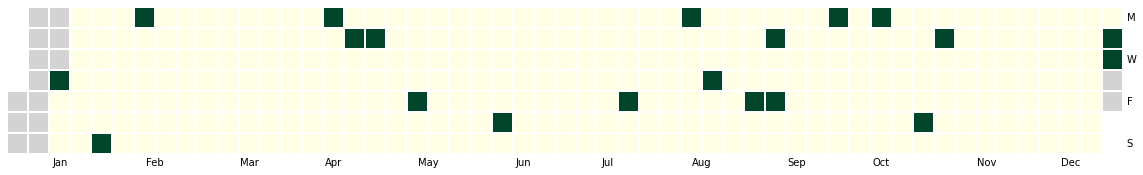

In [12]:
#plotting the calender heatmap for the year 2010
plt.figure(figsize=(20,10))
fig = calmap.yearplot(df['session_time'], cmap='YlGn', fillcolor='lightgrey',daylabels='MTWTFSS',dayticks=[0, 2, 4, 6],
                linewidth=2)

In [13]:
cal = fig.get_figure()
cal.savefig('cal.png')

In [14]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [15]:
df.to_csv('anganwadi_session_data.csv')

In [16]:
df = pd.read_csv('anganwadi_session_data.csv')

In [20]:
df['session_date'] = pd.to_datetime(df['session_date'])

In [21]:
df['year'] = df.session_date.dt.year
df['month'] = df.session_date.dt.month
df['Weekday'] = df.session_date.dt.day_name()

In [22]:
temp = df.loc[df['aww_id'] == 1]
temp = temp[['session_time','month','Weekday']]
temp.head()

,session_time,month,Weekday
0,1,8,Thursday
1,1,9,Friday
2,1,2,Monday
3,1,4,Monday
4,1,11,Tuesday


In [23]:
pivoted_data = pd.pivot_table(temp, values='session_time', index=['Weekday'] , columns=['month'], aggfunc=np.mean)
pivoted_data.head()
pivoted_data.fillna(0)

month,1,2,4,5,6,7,8,9,10,11,12
Weekday,,,,,,,,,,,
Friday,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Monday,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
Saturday,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Sunday,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thursday,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Tuesday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
Wednesday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
df.session_date

0    2021-08-19 12:09:53
1    2021-09-03 21:33:00
2    2021-02-08 21:32:26
3    2021-04-12 09:18:51
4    2021-11-02 05:29:50
5    2021-04-27 06:33:33
6    2021-10-30 15:35:19
7    2021-09-10 01:24:14
8    2021-09-07 20:06:28
9    2021-10-11 09:00:59
10   2021-05-14 11:03:23
11   2021-04-20 01:46:18
12   2021-06-12 22:20:37
13   2021-12-28 15:43:59
14   2021-01-31 21:06:20
15   2021-07-23 22:52:21
16   2021-12-29 18:54:04
17   2021-01-14 12:00:29
18   2021-09-27 14:32:38
19   2021-08-09 19:22:24
Name: session_date, dtype: datetime64[ns]

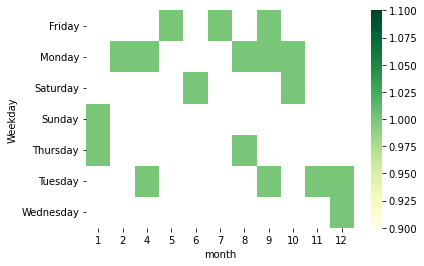

In [25]:
FIG = sns.heatmap(pivoted_data,cmap='YlGn',)

In [27]:
data = pd.DataFrame(columns=['aww_id','ben_id','session_time','session_date'])

In [28]:
data['aww_id'] = np.random.randint(1,5,1000)
data['ben_id'] = np.random.randint(1,5,1000)
data['session_time'] = np.random.randint(1,60,1000)
data['session_date'] = random_dates(pd.to_datetime('2019-01-01'),pd.to_datetime('2022-01-01'),1000)
data['session_date'] = pd.to_datetime(data['session_date'])

In [29]:
data.head()

,aww_id,ben_id,session_time,session_date
0,2,4,22,2020-10-22 11:55:45
1,4,1,10,2021-09-28 11:52:28
2,1,1,39,2020-06-13 00:18:33
3,4,2,6,2019-12-26 02:09:32
4,1,1,4,2019-08-13 12:27:29


In [30]:
data.to_csv('aww_ben_session_time.csv')

In [31]:
ben = pd.DataFrame(columns=['ben_id','aww_id','pregnancy_days','session_date','session_time'])
ben['aww_id'] = np.random.randint(1,5,1000)
ben['ben_id'] = np.random.randint(1,5,1000)
ben['pregnancy_days'] = np.random.randint(1,1000,1000)
ben['session_time'] = np.random.randint(1,60,1000)
ben['session_date'] = random_dates(pd.to_datetime('2019-01-01'),pd.to_datetime('2022-01-01'),1000)
ben['session_date'] = pd.to_datetime(ben['session_date'])

In [32]:
ben.head()

,ben_id,aww_id,pregnancy_days,session_date,session_time
0,2,1,882,2021-08-21 22:11:51,54
1,1,2,655,2019-04-04 09:05:01,47
2,2,2,759,2020-09-27 06:10:26,10
3,1,1,189,2019-09-13 17:25:58,51
4,4,4,477,2021-01-22 07:57:15,29


In [33]:
ben.to_csv('ben.csv')

In [34]:
pd.read_csv('ben.csv',index_col=0)

,ben_id,aww_id,pregnancy_days,session_date,session_time
0,2,1,882,2021-08-21 22:11:51,54
1,1,2,655,2019-04-04 09:05:01,47
2,2,2,759,2020-09-27 06:10:26,10
3,1,1,189,2019-09-13 17:25:58,51
4,4,4,477,2021-01-22 07:57:15,29
...,...,...,...,...,...
995,4,4,810,2019-10-25 16:30:53,2
996,4,1,196,2020-06-06 22:16:16,12
997,1,1,207,2021-09-14 07:33:38,51
998,2,1,999,2020-02-08 05:52:05,7


In [38]:
ben['ben_name'] = "null"

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [49]:
ben.loc[ben['ben_id'] == 1,'ben_name'] = "Reshma"
ben.loc[ben['ben_id'] == 2,'ben_name'] = "Sushma"
ben.loc[ben['ben_id'] == 3,'ben_name'] = "Vaishnavi"
ben.loc[ben['ben_id'] == 4,'ben_name'] = "Rekha"
ben.loc[ben['ben_id'] == 5,'ben_name'] = "Radha"

In [46]:
ben.to_csv('ben.csv')

In [47]:
ben['ben_name'][0]

'Sushma'

In [52]:
ben['aww_name'] = "null"
ben.loc[ben['aww_id'] == 1,'aww_name'] = "Aishwarya"
ben.loc[ben['aww_id'] == 2,'aww_name'] = "Ananya"
ben.loc[ben['aww_id'] == 3,'aww_name'] = "Astha"
ben.loc[ben['aww_id'] == 4,'aww_name'] = "Vidya"
ben.loc[ben['aww_id'] == 5,'aww_name'] = "Gopi"

In [53]:
ben['risklevel'] = np.random.randint(1,3,1000)

In [54]:
ben.to_csv('ben.csv')

In [56]:
np.random.randn(1000, 2) / [50, 50] 

array([[ 0.00446082, -0.00468631],
       [ 0.00180638,  0.0038945 ],
       [-0.0003212 ,  0.01532287],
       ...,
       [ 0.00397641,  0.01330385],
       [-0.02229867, -0.01712688],
       [-0.01876117, -0.01146527]])

In [57]:
sns.lineplot(ben,x='session_date',y='')

C:\Users\Kartikeya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: If using all scalar values, you must pass an index

In [58]:
ben.head()

,ben_id,aww_id,pregnancy_days,session_date,session_time,ben_name,aww_name,risklevel
0,2,1,882,2021-08-21 22:11:51,54,Sushma,Aishwarya,2
1,1,2,655,2019-04-04 09:05:01,47,Reshma,Ananya,1
2,2,2,759,2020-09-27 06:10:26,10,Sushma,Ananya,2
3,1,1,189,2019-09-13 17:25:58,51,Reshma,Aishwarya,2
4,4,4,477,2021-01-22 07:57:15,29,Rekha,Vidya,2


risklevel
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: session_date, dtype: object

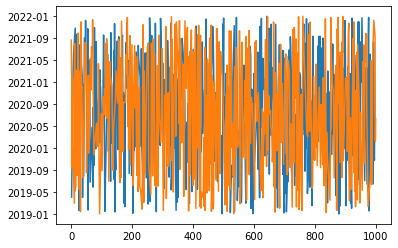

In [63]:
ben.groupby(by='risklevel')['session_date'].plot()

In [99]:
ben = pd.read_csv('ben.csv',index_col=0)
ben.head()
ben['session_date'] = pd.to_datetime(ben['session_date'])

In [100]:
ben['session_date'] = ben['session_date'].dt.strftime('%Y-%m')

In [101]:
x = ben.groupby(['session_date'])['risklevel'].value_counts().unstack().fillna(0).astype(int).reindex()
x.columns = ['low_risk','mid_risk','high_risk']

In [102]:
ben.head()

,Unnamed: 0,ben_id,aww_id,pregnancy_days,session_date,session_time,ben_name,aww_name,risklevel
0,0,2,1,882,2021-08,54,Sushma,Aishwarya,3
1,1,1,2,655,2019-04,47,Reshma,Ananya,3
2,2,2,2,759,2020-09,10,Sushma,Ananya,3
3,3,1,1,189,2019-09,51,Reshma,Aishwarya,1
4,4,4,4,477,2021-01,29,Rekha,Vidya,1


In [103]:
ben['risklevel'].unique()

array([3, 1, 2], dtype=int64)

In [104]:
ben['risklevel'] = np.random.randint(1,4,1000)

In [105]:
ben.to_csv('ben.csv')

<AxesSubplot:xlabel='session_date'>

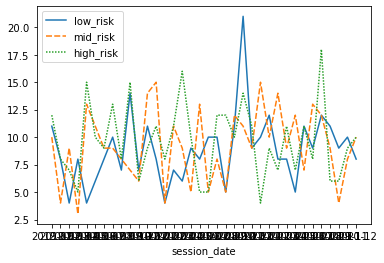

In [106]:
sns.lineplot(data=x)

In [107]:
ben['problems_addressed'] = np.random.randint(1,100,1000)

In [108]:
ben['solutions_provided'] =  np.random.randint(1,100,1000)

In [113]:
y = ben[ben['aww_id'] == 2]

<AxesSubplot:>

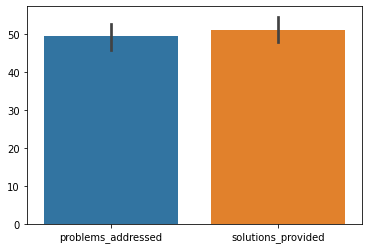

In [114]:
sns.barplot(data=y[['problems_addressed','solutions_provided']],)

In [119]:
ben.drop(columns=['Unnamed: 0'],inplace=True)

In [120]:
ben.to_csv('ben.csv')